<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

---

## Problem Statement

<span style="font-size: 16px;"> The year is 2019 and some schools in California are struggling with performance. This project aims to identify schools for the state to optimize its resources' allocation to improve performance metrics, based on their scores in standardized tests.

### Contents: 
- [<span style="font-size: 16px;"> Context](#Context)
- [<span style="font-size: 16px;"> Summary](#Summary)
- [<span style="font-size: 16px;"> Data Import & Cleaning](#Data-Import-and-Cleaning)
- [<span style="font-size: 16px;"> Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [<span style="font-size: 16px;"> Data Visualization](#Visualize-the-Data)
- [<span style="font-size: 16px;"> Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Context

<span style="font-size: 16px;"> Standardized tests are made with the purpose of measuring knowledge of all students equally. SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process.
<br> <br>
Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude  (</span>[<span style="font-size: 16px;"> *source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/) <span style="font-size: 16px;">). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Yet, they still represent the best parameter to evaluate students' performance in a large scale, since they apply the same metrics to everyone and ACT and SAT are the most widely used in the country.

## Summary

<span style="font-size: 16px;"> 
In this project, standardized test scores will be utilized to identify schools for the optimization of resources in California. Initially, an evaluation will be conducted to determine which standardized test is predominantly used across schools. Subsequently, the performance of students will be assessed based on the scores of the most commonly administered test in each school.
<br><br>
Schools that fall below the state's median percentage of benchmark achievement will be given priority. Priority will be determined by the number of enrolled students in each respective school, with the aim of maximizing the number of students benefiting from this strategy.

--- 
# Part 2


---

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [2]:
# reading california act and sat csv files
# standardizing columns
act_ca = pd.read_csv('../data/act_2019_ca.csv')
act_ca.columns = act_ca.columns.str.lower().str.replace(' ','_')

sat_ca = pd.read_csv('../data/sat_2019_ca.csv')
sat_ca.columns = sat_ca.columns.str.lower().str.replace(' ','_')

In [3]:
sat_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cds                    2579 non-null   float64
 1   ccode                  2579 non-null   float64
 2   cdcode                 2579 non-null   float64
 3   scode                  2579 non-null   float64
 4   rtype                  2579 non-null   object 
 5   sname                  1982 non-null   object 
 6   dname                  2521 non-null   object 
 7   cname                  2579 non-null   object 
 8   enroll12               2579 non-null   float64
 9   numtsttakr12           2579 non-null   float64
 10  numerwbenchmark12      2304 non-null   object 
 11  pcterwbenchmark12      2304 non-null   object 
 12  nummathbenchmark12     2304 non-null   object 
 13  pctmathbenchmark12     2304 non-null   object 
 14  enroll11               2579 non-null   float64
 15  numt

In [4]:
act_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cds          2309 non-null   float64
 1   ccode        2309 non-null   float64
 2   cdcode       2309 non-null   float64
 3   scode        1787 non-null   float64
 4   rtype        2309 non-null   object 
 5   sname        1729 non-null   object 
 6   dname        2251 non-null   object 
 7   cname        2309 non-null   object 
 8   enroll12     2309 non-null   float64
 9   numtsttakr   2309 non-null   float64
 10  avgscrread   1953 non-null   object 
 11  avgscreng    1953 non-null   object 
 12  avgscrmath   1953 non-null   object 
 13  avgscrsci    1953 non-null   object 
 14  numge21      1953 non-null   object 
 15  pctge21      1953 non-null   object 
 16  year         2309 non-null   object 
 17  unnamed:_17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [5]:
sat_ca.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr12,...,numerwbenchmark11,pcterwbenchmark11,nummathbenchmark11,pctmathbenchmark11,totnumbothbenchmark12,pctbothbenchmark12,totnumbothbenchmark11,pctbothbenchmark11,year,unnamed:_25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [6]:
act_ca.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,year,unnamed:_17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


<span style="font-size: 16px;"> The datasets have rows for the respective schools, districts, counties and the state, with the column 'rtype' identifying which geographical level it represents.

In [7]:
sat_ca['rtype'].value_counts()

S    1981
D     539
C      58
X       1
Name: rtype, dtype: int64

In [8]:
act_ca['rtype'].value_counts()

S    1728
D     522
C      58
X       1
Name: rtype, dtype: int64

<span style="font-size: 16px;"> The most granular level of analysis is at the school level, which collectively form districts, followed by counties, and ultimately, the state. To retain most of the information, I will primarily focus on school-level data and aggregate as necessary. Maintaining this level of granularity ensures the program has a localized impact and this can facilitate progress tracking.

<span style="font-size: 16px;"> First of all, it is necessary to define which test to consider, if not both. For that, I will check the attendance of both of them overall and see if it's a pattern in the whole state or if some schools have a different pattern.

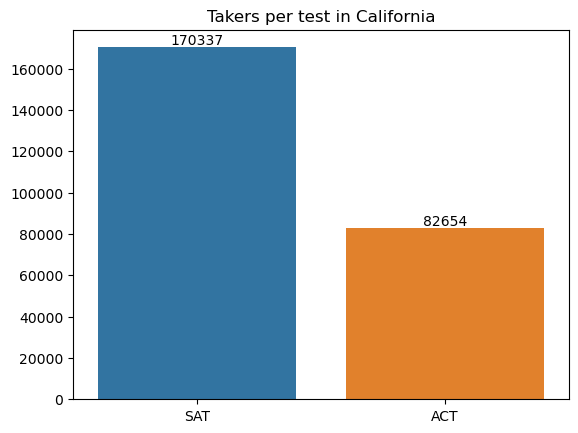

In [9]:
sat_takers = int(sat_ca[sat_ca['rtype']=='S']['numtsttakr12'].sum())
act_takers = int(act_ca[act_ca['rtype']=='S']['numtsttakr'].sum())
y = [sat_takers, act_takers]
ax = sns.barplot(x = ['SAT', 'ACT'], y=y)
ax.bar_label(ax.containers[0])
plt.title('Takers per test in California');

<span style="font-size: 16px;"> 
    There are more SAT takers overall in California, but there is still a reasonable number of ACT takers, maybe in a more granular level there is a different pattern... Let's see if there are schools with higher participation in ACT.
<br><br>
    To compare this participation, I'll merge both datasets. Let's just check the unique identifiers of schools, so there's no duplicates when we merge them.

In [10]:
unique_scode_sat = set(sat_ca['scode'].unique())
unique_scode_act = set(act_ca['scode'].unique())
unique_scodes = unique_scode_sat.union(unique_scode_act)

common_values = unique_scode_sat.intersection(unique_scode_act)
print('There are {} school codes in common between ACT and SAT datasets'.format(len(common_values)))

There are 1720 school codes in common between ACT and SAT datasets


In [11]:
print('The shape of SAT dataset with only schools is: ',sat_ca[sat_ca['rtype']=='S'].shape)
print('The shape of ACT dataset with only schools is: ',act_ca[act_ca['rtype']=='S'].shape)

print('There are {} unique school codes in SAT dataset.'.format(sat_ca[sat_ca['rtype']=='S']['scode'].nunique()))
print('There are {} unique school codes in ACT dataset.'.format(act_ca[act_ca['rtype']=='S']['scode'].nunique()))

The shape of SAT dataset with only schools is:  (1981, 26)
The shape of ACT dataset with only schools is:  (1728, 18)
There are 1981 unique school codes in SAT dataset.
There are 1728 unique school codes in ACT dataset.


<span style="font-size: 16px;"> 
All rows in SAT and ACT datasets with only schools are of different schools, there are no school duplicates.
<br><br>
There are 1720 school codes in common, it means there are other 261 school codes in SAT dataset not present in ACT dataset and 8 vice-versa. Let's merge the datasets keeping all school codes.

In [12]:
df_merged = pd.merge(sat_ca[sat_ca['rtype']=='S'], act_ca[act_ca['rtype']=='S'], how='outer', on='scode', suffixes=('_sat', '_act'))
df_merged.columns

Index(['cds_sat', 'ccode_sat', 'cdcode_sat', 'scode', 'rtype_sat', 'sname_sat',
       'dname_sat', 'cname_sat', 'enroll12_sat', 'numtsttakr12',
       'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12',
       'pctmathbenchmark12', 'enroll11', 'numtsttakr11', 'numerwbenchmark11',
       'pcterwbenchmark11', 'nummathbenchmark11', 'pctmathbenchmark11',
       'totnumbothbenchmark12', 'pctbothbenchmark12', 'totnumbothbenchmark11',
       'pctbothbenchmark11', 'year_sat', 'unnamed:_25', 'cds_act', 'ccode_act',
       'cdcode_act', 'rtype_act', 'sname_act', 'dname_act', 'cname_act',
       'enroll12_act', 'numtsttakr', 'avgscrread', 'avgscreng', 'avgscrmath',
       'avgscrsci', 'numge21', 'pctge21', 'year_act', 'unnamed:_17'],
      dtype='object')

In [13]:
print('Shape of merged act and sat dataset: ',df_merged.shape)

print('There are {} unique school codes in merged dataset.'.format(df_merged['scode'].nunique()))

Shape of merged act and sat dataset:  (1990, 43)
There are 1990 unique school codes in merged dataset.


In [14]:
# sat takers is the variable numtsttakr12 and act takers is the variable numtsttakr
df_merged.rename(columns={'numtsttakr':'act_takers','numtsttakr12':'sat_takers'}, inplace=True)

<span style="font-size: 16px;">  The main group of interest in this analysis are the students in grade 12, when most students take the test and must have the knowledge required. So columns ending with 11 will be removed, since they will not be considered. ACT data is already about this group, as specified in the </span>[<span style="font-size: 16px;"> data dictionary](https://web.archive.org/web/20210831222336/https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp). 

In [15]:
# deleting columns ending with '11'
columns_to_drop = [col for col in df_merged.columns if col.endswith('11')]
df_merged.drop(columns=columns_to_drop, inplace=True)

<span style="font-size: 16px;"> Predominance of ACT in the merged dataset:

In [16]:
# act is predominant in how many schools?
df_merged[df_merged['sat_takers']<df_merged['act_takers']].shape

(198, 35)

<span style="font-size: 16px;">  There are 198 schools with more students taking the ACT than the SAT. To better understand schools' performance, it is more realistic to evaluate the scores of the most popular test in each school, capturing the performance of the maximum number of students. I will first differentiate creating datasets to represent this preference, select the scores to analyze and then concatenate both datasets to evalute schools' performance.

In [17]:
sat_schools = df_merged[(df_merged['sat_takers']>=df_merged['act_takers']) | df_merged['act_takers'].isna()]
act_schools = df_merged[(df_merged['sat_takers']<df_merged['act_takers']) | df_merged['sat_takers'].isna()]

print('The shape of SAT dataset with only schools is: ',sat_schools.shape)
print('The shape of ACT dataset with only schools is: ',act_schools.shape)

The shape of SAT dataset with only schools is:  (1783, 35)
The shape of ACT dataset with only schools is:  (207, 35)


In [18]:
sat_schools.columns

Index(['cds_sat', 'ccode_sat', 'cdcode_sat', 'scode', 'rtype_sat', 'sname_sat',
       'dname_sat', 'cname_sat', 'enroll12_sat', 'sat_takers',
       'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12',
       'pctmathbenchmark12', 'totnumbothbenchmark12', 'pctbothbenchmark12',
       'year_sat', 'unnamed:_25', 'cds_act', 'ccode_act', 'cdcode_act',
       'rtype_act', 'sname_act', 'dname_act', 'cname_act', 'enroll12_act',
       'act_takers', 'avgscrread', 'avgscreng', 'avgscrmath', 'avgscrsci',
       'numge21', 'pctge21', 'year_act', 'unnamed:_17'],
      dtype='object')

<span style="font-size: 16px;">  The program will evaluate the overall score in the test, not discriminating between sections of the tests. For the SAT, it is the the percentage of students who met the benchmark of both evidence-based reading & writing (ERW) and math grade 12 (```pctbothbenchmark12``` ).  For the ACT, is it the percentage of test takers whose ACT composite scores are greater or equal to 21 (```pctge21```).

In [19]:
sat_schools = sat_schools[['scode', 'sname_sat','dname_sat', 'cname_sat', 'enroll12_sat','sat_takers',\
                       'pctbothbenchmark12']].copy()
sat_schools.rename(columns={'scode': 'school_code', 'dname_sat': 'district', 'cname_sat':'county',\
                   'sname_sat':'school_name', 'enroll12_sat':'enrollment', 'sat_takers':'test_takers',
                   'pctbothbenchmark12':'percent_achieved'}, inplace=True)

In [20]:
act_schools = act_schools[['scode', 'sname_act', 'dname_act', 'cname_act', 'enroll12_act', 'act_takers',\
                           'pctge21']].copy()

act_schools.rename(columns={'scode': 'school_code', 'dname_act': 'district', 'cname_act':'county',\
                   'sname_act':'school_name', 'enroll12_act':'enrollment','act_takers':'test_takers',\
                   'pctge21':'percent_achieved'}, inplace=True)

In [21]:
sat_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 0 to 1980
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       1783 non-null   float64
 1   school_name       1783 non-null   object 
 2   district          1783 non-null   object 
 3   county            1783 non-null   object 
 4   enrollment        1783 non-null   float64
 5   test_takers       1783 non-null   float64
 6   percent_achieved  1566 non-null   object 
dtypes: float64(3), object(4)
memory usage: 111.4+ KB


In [22]:
act_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 13 to 1989
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       207 non-null    float64
 1   school_name       207 non-null    object 
 2   district          207 non-null    object 
 3   county            207 non-null    object 
 4   enrollment        207 non-null    float64
 5   test_takers       207 non-null    float64
 6   percent_achieved  207 non-null    object 
dtypes: float64(3), object(4)
memory usage: 12.9+ KB


<span style="font-size: 16px;"> The column of the percentage of students who achieved the desired grades have object as dtype, let's check that...

In [23]:
sat_schools['percent_achieved'].unique()[:5]

array([nan, '*', '13.73', '15.93', '33.96'], dtype=object)

In [24]:
act_schools['percent_achieved'].unique()[:5]

array(['22.22', '27.84', '93.99', '*', '17.95'], dtype=object)

<span style="font-size: 16px;">  It is specified in </span>[<span style="font-size: 16px;"> ACT data dictionary](https://web.archive.org/web/20210831222336/https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp) <span style="font-size: 16px;">that ```*``` is for schools with 14 or fewer students taking the ACT. Maybe these schools with ```*``` or ```null``` as values for the percentage are small schools and, for this project's purpose, removing these will not be a problem.

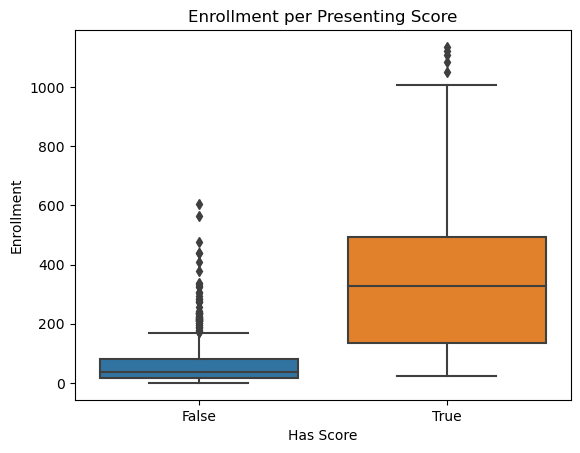

In [25]:
sat_schools['has_score'] = ((sat_schools['percent_achieved'].notna()) & (sat_schools['percent_achieved'] != '*'))*1

sns.boxplot(data=sat_schools, x='has_score', y='enrollment')
plt.title('Enrollment per Presenting Score')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Enrollment');

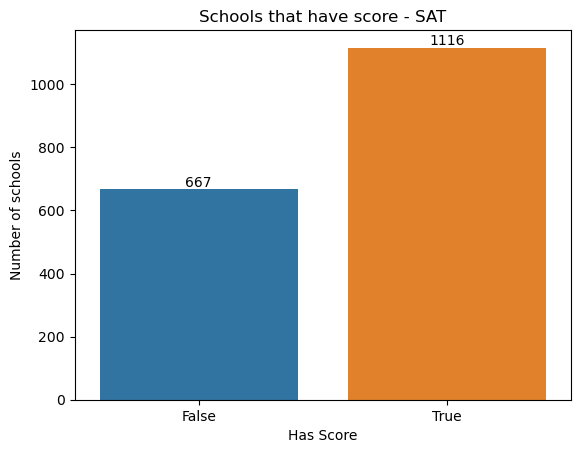

In [26]:
ax = sns.countplot(x='has_score', data=sat_schools)
ax.bar_label(ax.containers[0])
plt.title('Schools that have score - SAT')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Number of schools');

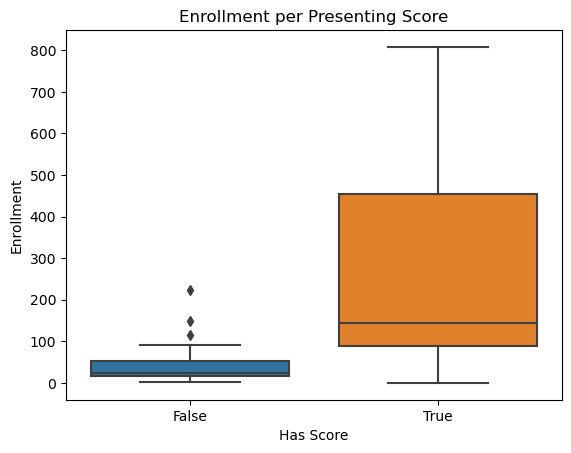

In [27]:
act_schools['has_score'] = ((act_schools['percent_achieved'].notna()) & (act_schools['percent_achieved'] != '*'))*1

sns.boxplot(data=act_schools, x='has_score', y='enrollment')
plt.title('Enrollment per Presenting Score')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Enrollment');

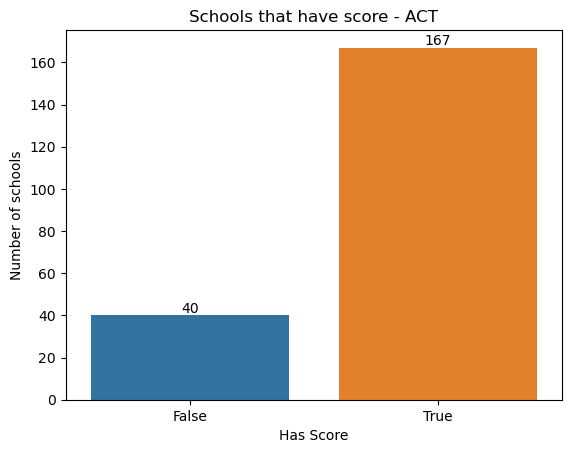

In [28]:
ax = sns.countplot(x='has_score', data=act_schools)
ax.bar_label(ax.containers[0])
plt.title('Schools that have score - ACT')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Number of schools');

<span style="font-size: 16px;">Schools with missing scores in both datasets have considerably smaller enrollments compared to those that do have scores. Even though the enrollments are relatively small, SAT dataset has a considerable amount of schools not presenting scores, adding to more than a third of schools. <br> Given the program's objective to maximize benefits for students, the analysis will not consider schools that do not have score due to their size and lack of information. These will be removed from the study, but it is recommended to have a closer look when possible, since they represent a considerable portion of schools, specially in SAT dataset.

In [29]:
sat_schools = sat_schools[sat_schools['has_score']==True]
act_schools = act_schools[act_schools['has_score']==True]

In [30]:
schools = pd.concat([sat_schools, act_schools])
schools['percent_achieved'] = schools['percent_achieved'].astype(float)
schools.head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
2,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,13.73,1
3,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,15.93,1
5,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,33.96,1
6,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,69.47,1
7,3336955.0,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,11.76,1


In [31]:
print('Shape of schools dataset: ',schools.shape)

print('There are {} unique school codes in schools dataset.'.format(schools['school_code'].nunique()))

Shape of schools dataset:  (1283, 8)
There are 1283 unique school codes in schools dataset.


<span style="font-size: 16px;">To also evaluate attendance of these tests, I will create a variable with the proportion of test takers in the enrollment. Before dividing the number of test takers by the enrollment, let's see if there is no school with enrollment 0 or below:

In [32]:
schools[schools['enrollment']<=0]

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
1987,133280.0,PUC Nueva Esperanza Charter Academy,Los Angeles Unified,Los Angeles,0.0,22.0,4.55,1


In [33]:
# removing the school with enrollment 0
schools = schools[schools['enrollment']!=0]

In [34]:
# Creating a column with the percentage of students who took SAT
schools['percent_takers'] = schools['test_takers']/schools['enrollment']*100
# removing 'has_score' column that has already been filtered
schools.drop(columns='has_score', inplace=True)

schools.head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers
2,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,13.73,49.514563
3,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,15.93,49.779736
5,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,33.96,63.855422
6,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,69.47,33.807829
7,3336955.0,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,11.76,14.912281


In [35]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 2 to 1982
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       1282 non-null   float64
 1   school_name       1282 non-null   object 
 2   district          1282 non-null   object 
 3   county            1282 non-null   object 
 4   enrollment        1282 non-null   float64
 5   test_takers       1282 non-null   float64
 6   percent_achieved  1282 non-null   float64
 7   percent_takers    1282 non-null   float64
dtypes: float64(5), object(3)
memory usage: 90.1+ KB


### Data Dictionary

|Feature|Type|Description|
|---|---|---|
|school_code|float|code of the school|
|school_name|object|name of the school|
|district|object|name of the district of the school|
|county|object|name of the county of the school|
|enrollment|object|number of students enrolled in grade 12|
|test_takers|float| number of students who took the test preferred for the respective school|
|percent_students|float|Percentage of test takers whose composite scores are greater than the respective test benchmark|
|percent_takers|float|Percentage of test takers in enrollment|

# Exploratory Data Analysis

<span style="font-size: 16px;">To have a baseline to compare schools as underperformers or overperformers, let's see the statistics of the percentage of students who achieved the benchmark in the schools:

In [36]:
schools['percent_achieved'].describe()

count    1282.000000
mean       41.313627
std        24.375783
min         0.000000
25%        21.020000
50%        38.515000
75%        60.462500
max       100.000000
Name: percent_achieved, dtype: float64

<span style="font-size: 16px;">The median might be a good metric to compare schools as underperformers or overperformers, since 50% has a score below it and 50% above it. Let's create a variable to store it.

In [37]:
# creating the median of benchmark percentages of schools
achieved_median = schools['percent_achieved'].median()
print(achieved_median)

38.515


<span style="font-size: 16px;">It can be interesting to see if weighting by the number of students enrolled the statistics get a little different, so let's weight by the number of students enrolled:

In [38]:
schools['weighted_benchmark'] = schools.apply(lambda x: np.average(x['percent_achieved'], weights=x['enrollment']), axis=1)
schools['weighted_benchmark'].describe()

count    1282.000000
mean       41.313627
std        24.375783
min         0.000000
25%        21.020000
50%        38.515000
75%        60.462500
max       100.000000
Name: weighted_benchmark, dtype: float64

<span style="font-size: 16px;">It is weird that the statistics did not change, I would expect them to be different, since the respective data dictionaries of ACT and SAT do not mention weighting by the number of students. For lack of information, let's stick to the median of benchmark achieved in schools.

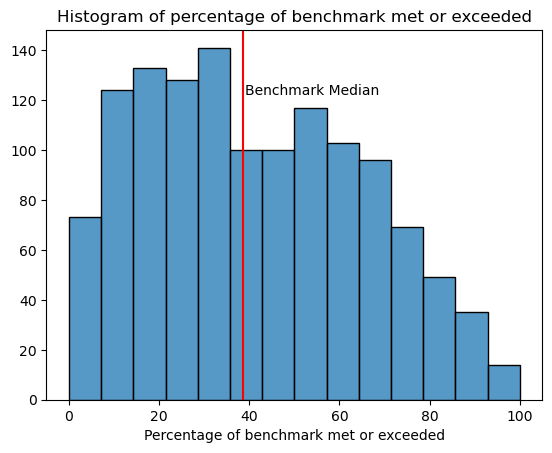

In [39]:
ax = sns.histplot(data = schools, x='percent_achieved')
ax.text(39, 122, 'Benchmark Median') 
plt.axvline(x=achieved_median, color='r')
plt.xlabel('Percentage of benchmark met or exceeded')
plt.ylabel('')
plt.title('Histogram of percentage of benchmark met or exceeded');

<span style="font-size: 16px;"> Let's examine whether there's a correlation between the benchmark percentage, the number of test takers, and the school enrollment size.  Since the main objective of this project is to optimize resources' allocation by choosing schools underperforming that have a high number of students, it would be nice to see if there is a relationship between score and size of school. <br><br> Additionally, we should consider schools' participation rates, as they enable the evaluation of school performance. Moreover, participation rates may influence scores, possibly due to encouragement from schools to take the test.

<Figure size 2000x4000 with 0 Axes>

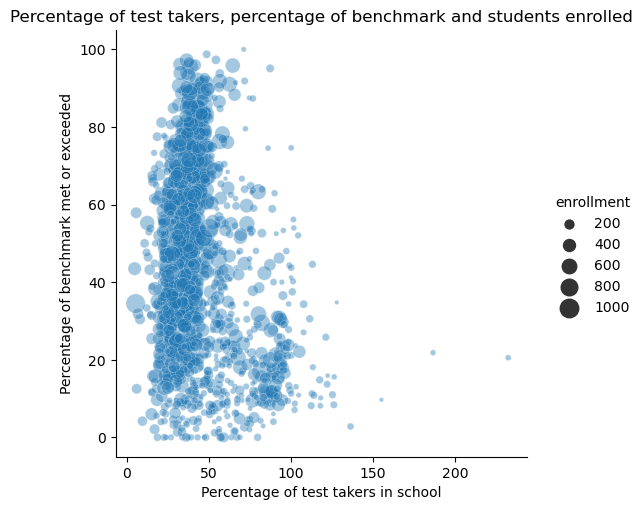

In [40]:
plt.figure(figsize = (20, 40))

sns.relplot(
    data=schools, x="percent_takers", y="percent_achieved",
    size="enrollment", sizes = (10, 200), alpha = 0.4
)

plt.xlabel('Percentage of test takers in school')
plt.ylabel('Percentage of benchmark met or exceeded')
plt.title('Percentage of test takers, percentage of benchmark and students enrolled');

<span style="font-size: 16px;"> The graph does not show a relationship between size of school and test score. Most schools have participation rates around 25-50%.
    <br>There are schools with percentages of test takers greater than 100%, due to the number of test takers being larger than enrollment in grade 12, because students from other grades take the tests. Let's see if this happens in both datasets:

In [41]:
act_schools[act_schools['test_takers']>act_schools['enrollment']].head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
111,118497.0,Aspire Langston Hughes Academy,Stockton Unified,San Joaquin,83.0,94.0,18.09,1
207,5235106.0,Los Molinos High,Los Molinos Unified,Tehama,37.0,38.0,23.68,1
407,132100.0,Aspire Richmond Ca. College Preparatory Academy,West Contra Costa Unified,Contra Costa,50.0,59.0,10.17,1
434,112128.0,Aspire Ollin University Preparatory Academy,Los Angeles County Office of Education,Los Angeles,118.0,133.0,11.28,1
525,132282.0,Ednovate - East College Prep,Los Angeles Unified,Los Angeles,79.0,85.0,27.06,1


In [42]:
sat_schools[sat_schools['test_takers']>sat_schools['enrollment']].head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
782,111856.0,American Indian Public High,Oakland Unified,Alameda,62.0,63.0,53.97,1
975,100602.0,"Lennox Mathematics, Science and Technology Aca...",Lennox,Los Angeles,143.0,144.0,37.50,1
1056,3030608.0,Middle College High,Santa Ana Unified,Orange,86.0,87.0,40.23,1
1527,730291.0,Middle College High,West Contra Costa Unified,Contra Costa,72.0,73.0,56.16,1
1566,1996610.0,Los Angeles Leadership Academy,Los Angeles Unified,Los Angeles,44.0,46.0,10.87,1


<span style="font-size: 16px;">For lack of further information on grade 12 participation, let's consider these schools with 100% participation.

In [43]:
schools.loc[schools['percent_takers']>100] = 100

<Figure size 2000x4000 with 0 Axes>

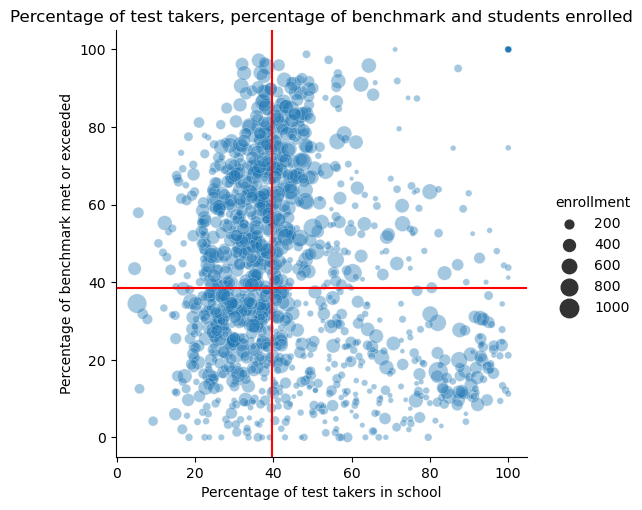

In [44]:
takers_median = schools['percent_takers'].median()

plt.figure(figsize = (20, 40))

sns.relplot(
    data=schools, x="percent_takers", y="percent_achieved",
    size="enrollment", sizes = (10, 200), alpha = 0.4
)
plt.axhline(y = achieved_median,color='r')
plt.axvline(x = takers_median, color='r')

plt.xlabel('Percentage of test takers in school')
plt.ylabel('Percentage of benchmark met or exceeded')
plt.title('Percentage of test takers, percentage of benchmark and students enrolled');

<span style="font-size: 16px;">Schools that are on the lower side of the graph are behind in terms of performance, and schools that are on the left side are behind in terms of test takers, both relative to the state's median. <br><br>
Let's filter schools underperforming in terms of percentage of students who achieved benchmark, and sort by enrollment size, than I will get the first schools that add to 10% of students in California.

In [45]:
#filtering underperformes
underperformers = schools[schools['percent_achieved'] < achieved_median]
# sorting by values of enrollment
underperformers = underperformers.sort_values(by='enrollment', ascending=False)
# resetting index
underperformers = underperformers.reset_index()
# creating a column with the cumulative sum of students
underperformers['cumsum_enrolled'] = underperformers['enrollment'].cumsum()
underperformers.head()

,index,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers,weighted_benchmark,cumsum_enrolled
0,34,1936749.0,Paramount High,Paramount Unified,Los Angeles,1135.0,932.0,16.95,82.114537,16.95,1135.0
1,1505,3430717.0,Visions In Education,San Juan Unified,Sacramento,1107.0,58.0,34.48,5.239386,34.48,2242.0
2,680,1030626.0,Central High East Campus,Central Unified,Fresno,913.0,379.0,24.80,41.511501,24.80,3155.0
3,908,1939875.0,Wilson High,Long Beach Unified,Los Angeles,818.0,671.0,29.51,82.029340,29.51,3973.0
4,1178,1931047.0,Birmingham Community Charter High,Los Angeles Unified,Los Angeles,798.0,698.0,19.91,87.468672,19.91,4771.0


In [46]:
# getting the underperforming schools that add to 10% of California students
num_10 = schools['enrollment'].sum()*(0.1)
underperformers[underperformers['cumsum_enrolled']>=num_10]

,index,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers,weighted_benchmark,cumsum_enrolled
64,1757,3333770.0,Moreno Valley High,Moreno Valley Unified,Riverside,540.0,472.0,11.65,87.407407,11.65,41727.0
65,355,114157.0,Patriot High,Jurupa Unified,Riverside,539.0,201.0,37.81,37.291280,37.81,42266.0
66,1252,3631157.0,Colony High,Chaffey Joint Union High,San Bernardino,539.0,213.0,33.33,39.517625,33.33,42805.0
67,1380,3633302.0,Fontana High,Fontana Unified,San Bernardino,538.0,496.0,8.47,92.193309,8.47,43343.0
68,252,1536606.0,West High,Kern High,Kern,537.0,122.0,25.41,22.718808,25.41,43880.0
...,...,...,...,...,...,...,...,...,...,...,...
608,187,117010.0,Minarets High,Chawanakee Unified,Madera,36.0,20.0,35.00,55.555556,35.00,167142.0
609,1974,106906.0,Bay Area Technology,Oakland Unified,Alameda,35.0,19.0,21.05,54.285714,21.05,167177.0
610,293,126292.0,Reedley Middle College High,Kings Canyon Joint Unified,Fresno,34.0,31.0,16.13,91.176471,16.13,167211.0
611,1305,108795.0,Creative Connections Arts Academy,Twin Rivers Unified,Sacramento,34.0,32.0,31.25,94.117647,31.25,167245.0


In [47]:
index_10_percent = (underperformers['cumsum_enrolled'] >= num_10).idxmax()
print(index_10_percent)

64


In [48]:
underperformers_10 = underperformers.loc[:64]
underperformers_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               65 non-null     int64  
 1   school_code         65 non-null     float64
 2   school_name         65 non-null     object 
 3   district            65 non-null     object 
 4   county              65 non-null     object 
 5   enrollment          65 non-null     float64
 6   test_takers         65 non-null     float64
 7   percent_achieved    65 non-null     float64
 8   percent_takers      65 non-null     float64
 9   weighted_benchmark  65 non-null     float64
 10  cumsum_enrolled     65 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.7+ KB


In [49]:
print("The {} larger underperforming schools add to 10% of the state's students".format(underperformers_10.shape[0]))
print("The {} larger underperforming schools are in {} districts and {} counties.".format(
    underperformers_10.shape[0], 
    underperformers_10['district'].nunique(), 
    underperformers_10['county'].nunique()
))


The 65 larger underperforming schools add to 10% of the state's students
The 65 larger underperforming schools are in 38 districts and 12 counties.


In [50]:
enrolled_per_counties = underperformers_10.groupby('county')[['enrollment']].sum().sort_values('enrollment', ascending=False)
enrolled_per_counties = enrolled_per_counties.reset_index(drop=False)

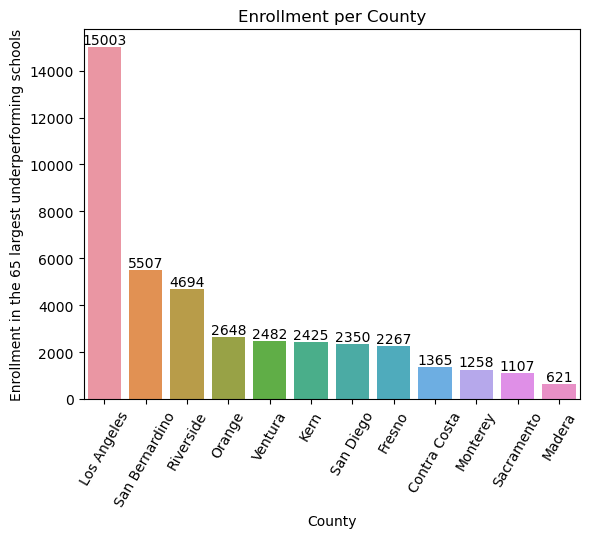

In [51]:
ax = sns.barplot(data=enrolled_per_counties, x='county', y='enrollment')
ax.bar_label(ax.containers[0])
# Add labels and title
plt.xlabel('County')
plt.ylabel('Enrollment in the {} largest underperforming schools'.format(underperformers_10.shape[0]))
plt.title('Enrollment per County')
plt.xticks(rotation=60)
plt.show()

<span style="font-size: 16px;"> Los Angeles is by far the county with more students, almost 3 times the number of students of the second largest county in this selection.

# Conclusions and Recommendations

<span style="font-size: 16px;">
In its first phase, the program considers 10% of students in grade 12 in California in underperforming schools. This project selects, then, the underperforming schools that add to 10% of students in the state.<br><br>
Performance was defined based on the state's median overall score. This project did not discriminate different sections of the tests. Schools with scores that fell below the median of the state were classified as underperformes, and then were prioritized according to the size, which was represented by the number of students enrolled in grade 12.<br><Br>
After sorting the underperforming schools by their size, I filtered the largest schools that add to 10% of students enrolled in grade 12 in California. There were 65 schools adding up to approximately 42k students, located in 38 districts, 12 counties. Not surprisingly, due to its populaiton size, Los Angeles was by far the county with more students after this selection. The second largest county in this selection, San Bernardino, was almost 3x smaller than Los Angeles in terms of students enrolled, followed by Riverside, Orange, Ventura, Kern, San Diego, Fresno, Contra Costa, Monterey, Sacramento and Madera.

**<span style="font-size: 18px;"> Next Steps**
- <span style="font-size: 16px;"> Check the ratio of ACT and SAT benchmark achievement, to check if students achieve the benchmarks at similar rates. If so, these two benchmarks are comparable in the way shown in this project.
- <span style="font-size: 16px;"> Have a closer look at schools that were not considered in this project due to score absence, but that could have a reasonable amount of students.
- <span style="font-size: 16px;"> If a more specific approach is desired for resources' allocation, on suggestion is to discriminate between scores in different sections of these tests.